# Guide to Training AI for Waste Sorting! 🗑️♻️

Welcome! In this notebook, you'll learn how to teach a computer to recognize different types of waste.

**What you'll learn:**
- 📊 How to look at pictures (data)
- 🧠 How to train an AI model
- 🎯 How to test if it works
- 🎉 How to use it to classify trash!

Let's start!

## Step 1: Import Our Tools 🛠️

First, we need to import the tools we'll use. Think of these like opening your toolbox!

In [1]:
# Import libraries (our AI tools!)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

print("✅ Tools loaded!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Using GPU: {len(tf.config.list_physical_devices('GPU')) > 0}")

✅ Tools loaded!
TensorFlow version: 2.10.0
Using GPU: True


## Step 2: Load Our Pictures 📸

We have pictures of different types of waste. Let's load them and see how many we have!

In [2]:
# Path to our waste images
data_dir = 'data'

# Image settings
IMG_SIZE = 128  # Small size = faster training (good for learning!)
BATCH_SIZE = 32

# Load the data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Save 20% for testing
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# Get class names
class_names = train_ds.class_names
print(f"\n🗑️ Types of waste we can identify: {class_names}")
print(f"📊 Number of categories: {len(class_names)}")

Found 10304 files belonging to 6 classes.
Using 8244 files for training.
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.92 GB



2026-01-09 10:05:11.629004: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-09 10:05:11.629458: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 10304 files belonging to 6 classes.
Using 2060 files for validation.

🗑️ Types of waste we can identify: ['Cardboard', 'General-Waste', 'Glass', 'Metals', 'Paper', 'Plastic']
📊 Number of categories: 6


## Step 3: Look at Some Examples 👀

Let's see what our pictures look like!

2026-01-09 10:05:22.401054: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


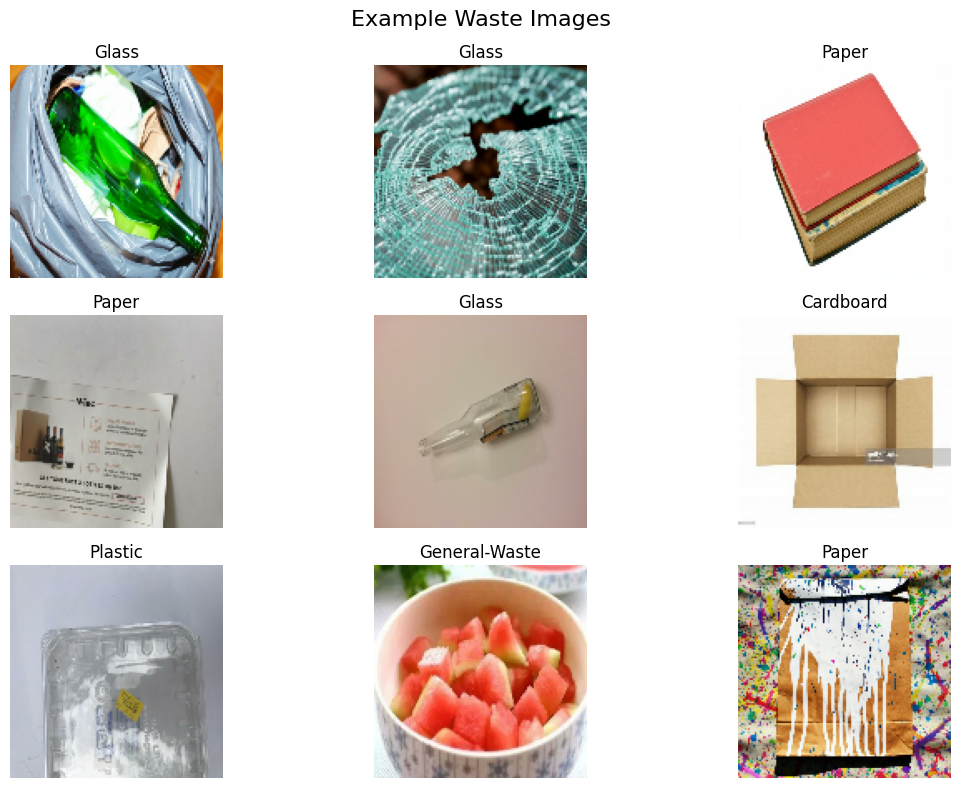

👆 These are the images our AI will learn from!


In [3]:
# Show some example images
plt.figure(figsize=(12, 8))

for images, labels in train_ds.take(1):  # Take one batch
    for i in range(9):  # Show 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.suptitle("Example Waste Images", fontsize=16)
plt.tight_layout()
plt.show()

print("👆 These are the images our AI will learn from!")

## Step 4: Build Our AI Brain 🧠

Now let's create a simple neural network (AI brain) that will learn to recognize waste!

In [29]:
# Build a simple CNN (Convolutional Neural Network)
model = keras.Sequential([
    # Layer 1: Normalize pixel values (0-255 → 0-1)
    layers.Rescaling(1./255),
    
    # Layer 2: Find patterns in images (like edges)
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    # Layer 3: Find more complex patterns
    # layers.Conv2D(64, 3, activation='relu'),
    # layers.MaxPooling2D(),
    
    # Layer 4: Find even more complex patterns
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    # Layer 5: Flatten to prepare for decision making
    layers.Flatten(),
    
    # Layer 6: Dense layer to combine information
    layers.Dense(128, activation='relu'),
    
    # Layer 7: Final decision layer (which type of waste?)
    layers.Dense(len(class_names))
])

# Show the model structure
model.build((None, IMG_SIZE, IMG_SIZE, 3))
model.summary()

print("\n✅ AI Brain created! It has", model.count_params(), "parameters to learn!")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 128)       36992     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 115200)           

## Step 5: Compile the Model ⚙️

Now we need to tell the model HOW to learn:

In [30]:
# Compile the model
model.compile(
    optimizer='adam',  # How to update the brain
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # How to measure mistakes
    metrics=['accuracy']  # How to track improvement
)

print("✅ Model is ready to learn!")

✅ Model is ready to learn!


## Step 6: Train the Model! 🏋️

This is where the magic happens! The AI will look at thousands of pictures and learn patterns.

**What's happening:**
- Each **epoch** is one complete pass through all the training images
- **Accuracy** shows how often the AI guesses correctly
- **Loss** shows how wrong the guesses are (lower is better!)

In [31]:
# Train for 10 epochs (you can increase this for better accuracy!)
EPOCHS = 20

print("🏃 Starting training...")
print("This will take a few minutes. Watch the accuracy go up!\n")

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

print("\n🎉 Training complete!")

🏃 Starting training...
This will take a few minutes. Watch the accuracy go up!

Epoch 1/20


2026-01-09 11:50:02.152798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


258/258 [==============================] - ETA: 0s - loss: 1.7796 - accuracy: 0.2519

2026-01-09 11:50:16.425944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


258/258 [==============================] - 17s 60ms/step - loss: 1.7796 - accuracy: 0.2519 - val_loss: 1.7353 - val_accuracy: 0.3000
Epoch 2/20
258/258 [==============================] - 15s 57ms/step - loss: 1.5452 - accuracy: 0.3711 - val_loss: 1.5379 - val_accuracy: 0.3903
Epoch 3/20
258/258 [==============================] - 15s 58ms/step - loss: 1.3098 - accuracy: 0.4926 - val_loss: 1.6418 - val_accuracy: 0.4000
Epoch 4/20
258/258 [==============================] - 16s 60ms/step - loss: 0.9872 - accuracy: 0.6309 - val_loss: 2.0625 - val_accuracy: 0.3864
Epoch 5/20
258/258 [==============================] - 16s 60ms/step - loss: 0.6701 - accuracy: 0.7596 - val_loss: 2.6297 - val_accuracy: 0.4039
Epoch 6/20
258/258 [==============================] - 15s 59ms/step - loss: 0.4799 - accuracy: 0.8371 - val_loss: 3.0223 - val_accuracy: 0.3913
Epoch 7/20
258/258 [==============================] - 15s 58ms/step - loss: 0.3294 - accuracy: 0.8956 - val_loss: 3.5326 - val_accuracy: 0.4019
Epo

## Step 7: Visualize the Learning 📈

Let's see how our AI improved over time!

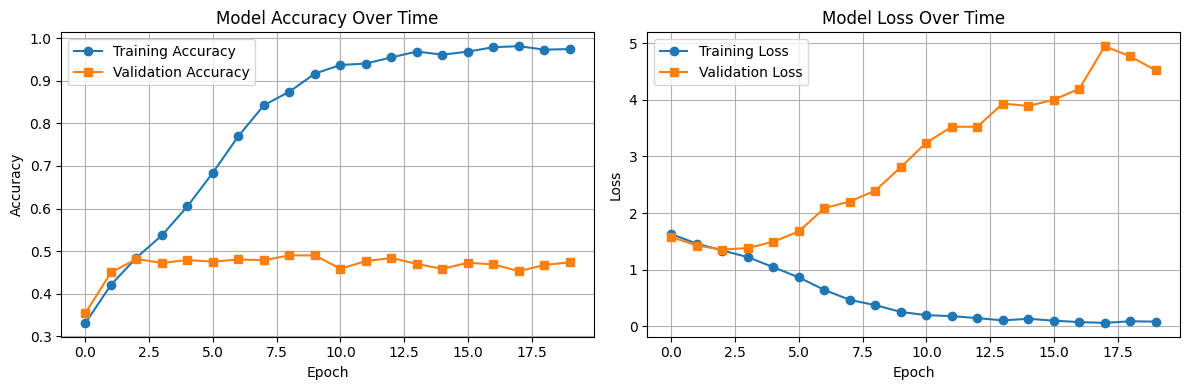


🎯 Final Accuracy: 47.38%
The higher the accuracy, the better the AI is at identifying waste!


In [25]:
# Plot training results
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

final_acc = history.history['val_accuracy'][-1]
print(f"\n🎯 Final Accuracy: {final_acc*100:.2f}%")
print("The higher the accuracy, the better the AI is at identifying waste!")

## Step 8: Test the AI! 🧪

Now let's see if our AI can correctly identify waste!

2026-01-09 11:46:28.780574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 298ms/step


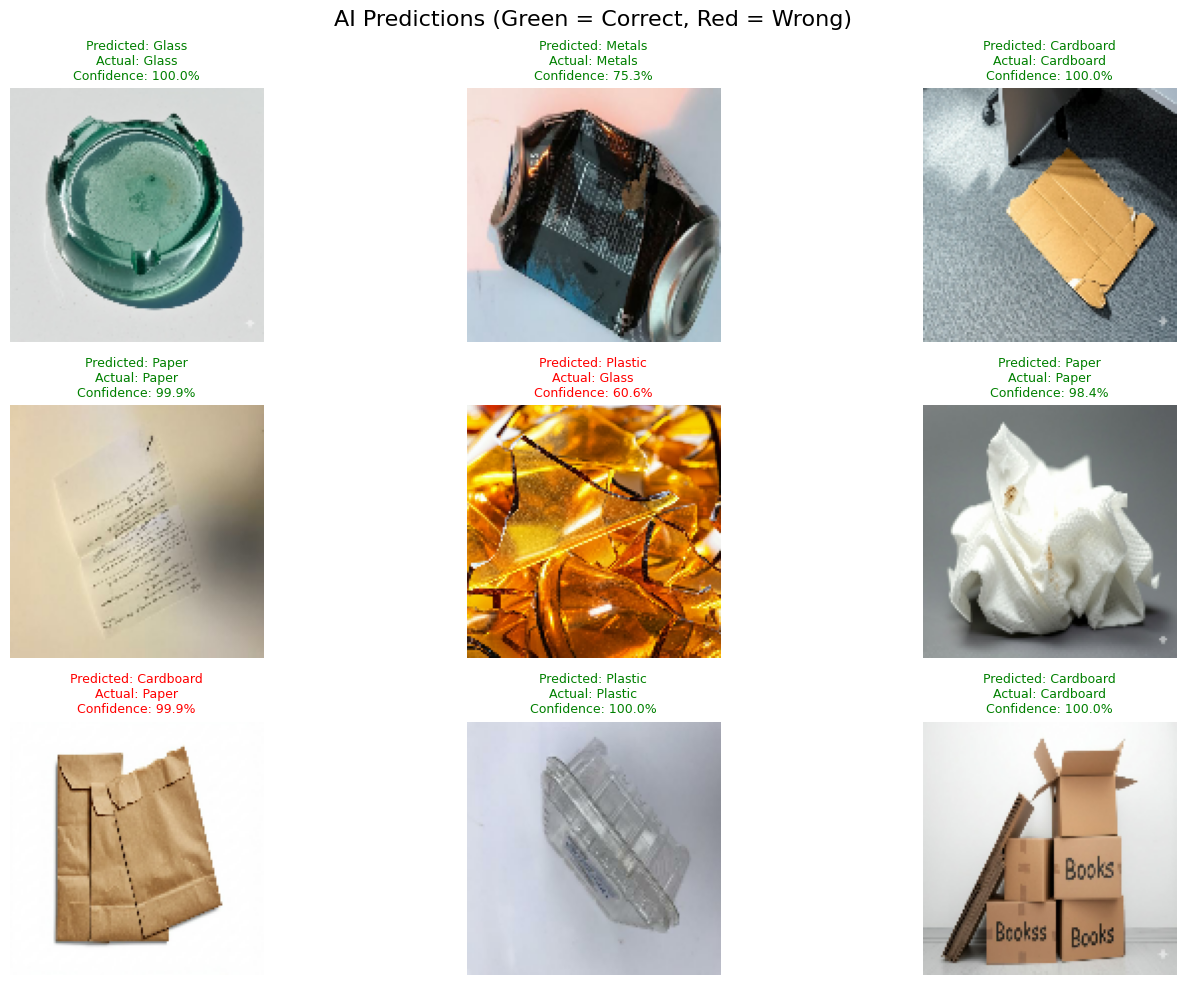

✅ Green titles mean the AI got it right!
❌ Red titles mean the AI made a mistake.


In [26]:
# Test on some images
plt.figure(figsize=(15, 10))

for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Get predicted class
        predicted_class = class_names[np.argmax(predictions[i])]
        true_class = class_names[labels[i]]
        confidence = np.max(tf.nn.softmax(predictions[i])) * 100
        
        # Color the title based on correctness
        color = 'green' if predicted_class == true_class else 'red'
        plt.title(f"Predicted: {predicted_class}\nActual: {true_class}\nConfidence: {confidence:.1f}%",
                 color=color, fontsize=9)
        plt.axis("off")

plt.suptitle("AI Predictions (Green = Correct, Red = Wrong)", fontsize=16)
plt.tight_layout()
plt.show()

print("✅ Green titles mean the AI got it right!")
print("❌ Red titles mean the AI made a mistake.")

## Step 9: Save Your Model 💾

Let's save our trained AI so we can use it later!

In [ ]:
# Save the model
model_path = 'waste-classification-app/models/kids_simple_model.keras'
model.save(model_path)

print(f"✅ Model saved to: {model_path}")
print("You can load this model anytime to classify waste!")

## 🎓 What You Learned Today!

Congratulations! You just trained an AI to identify waste! Here's what you did:

1. **Loaded pictures** of different types of waste
2. **Built a neural network** (AI brain) with layers
3. **Trained the model** by showing it thousands of examples
4. **Tested it** to see how well it works
5. **Saved it** for future use!

### 🌟 Challenges!

1. **Increase epochs**: Change `EPOCHS = 10` to `EPOCHS = 20` - does accuracy improve?
2. **Make it deeper**: Add more `Conv2D` layers to the model
3. **Change image size**: Try `IMG_SIZE = 224` for better quality (but slower training)
4. **Experiment**: What happens if you remove layers? Add more?

### 🎯 Real-World Application

This same technique is used in:
- 📱 Face recognition in your phone
- 🚗 Self-driving cars
- 🏥 Medical diagnosis
- ♻️ Smart recycling bins!

**Remember**: The more data and training, the smarter your AI becomes!